In [1]:
%matplotlib ipympl

import numpy as np

from H_radial_distribution import plot_rad_dist
from H_angular_distribution import plot_angular_dist
from H_orbital_plot import plot_orbital

# Task 1 (20 Points)

1. Perform a simulation for three different values of the quantum number n, starting at n = 1, leaving l at zero. What happens to the maximum of the probability distribution for increasing values of n? (15 pts)

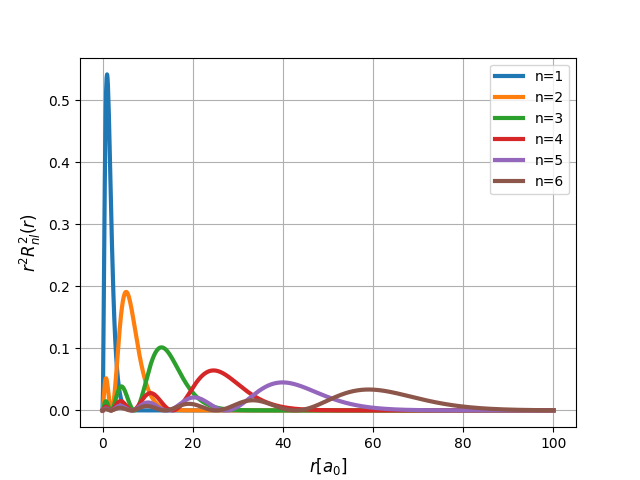

In [2]:
n = [1, 2, 3, 4, 5, 6]

import matplotlib as plt

for i in n:
    plot_rad_dist(n=i, l = 0)


The 